# Human Action Recognition

In [70]:
import os
import numpy as np
import cv2
import time
import h5py

In [81]:
import pathlib

import wget
import subprocess
import matplotlib.pyplot as plt

In [72]:
def download_ucf101(target_dir='../data/UCF101/'):
    print('1/2 Beginning file download...')

    compressed_dir = pathlib.Path(target_dir + '/compressed')
    compressed_dir.mkdir(parents=True, exist_ok=True)

    annotations_dir = pathlib.Path(target_dir + '/annotations')
    annotations_dir.mkdir(parents=True, exist_ok=True)
    
    destination_dir = pathlib.Path(target_dir + '/UCF-101')
    destination_dir.mkdir(parents=True, exist_ok=True)

    # download annotations for action recognition
    if pathlib.Path(compressed_dir/'UCF101TrainTestSplits-RecognitionTask.zip').exists():
        print ("File UCF101TrainTestSplits-RecognitionTask.zip exists.")
    else:    
        annotation_url = 'https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip'
        filename = wget.download(annotation_url, out=compressed_dir.as_posix(), bar=wget.bar_adaptive)
        print(f'File downloaded to {filename}')
        
    if pathlib.Path(compressed_dir/'UCF101TrainTestSplits-DetectionTask.zip').exists():
        print ("File UCF101TrainTestSplits-DetectionTask.zip exists.")
    else:        
        # download annotations for action detection
        annotation_url = 'https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-DetectionTask.zip'
        filename =wget.download(annotation_url, out=compressed_dir.as_posix(), bar=wget.bar_adaptive)
        print(f'File downloaded to {filename}')
        
    # download videos
    if pathlib.Path(compressed_dir/'UCF101.rar').exists():
        print ("File UCF101.rar exists.")
    else:            
        video_url = 'https://www.crcv.ucf.edu/data/UCF101/UCF101.rar'
        filename =wget.download(video_url, out=compressed_dir.as_posix(), bar=wget.bar_adaptive)
        print(f'File downloaded to {filename}')
        
    print('1/1 Completed.\n')



In [73]:
download_ucf101()

1/2 Beginning file download...
File UCF101TrainTestSplits-RecognitionTask.zip exists.
File UCF101TrainTestSplits-DetectionTask.zip exists.
File UCF101.rar exists.
1/1 Completed.



In [74]:
def extract_ucf101(target_dir='../data/UCF101/'):
    print('2/2 Extracting data...')

    target_dir = pathlib.Path(target_dir)
    
    compressed_dir = pathlib.Path(target_dir/'compressed')
    compressed_dir.mkdir(parents=True, exist_ok=True)

    annotations_dir = pathlib.Path(target_dir/'annotations')
    annotations_dir.mkdir(parents=True, exist_ok=True)
    
    destination_dir = pathlib.Path(target_dir/'UCF-101')
    destination_dir.mkdir(parents=True, exist_ok=True)   

    try:
        bash_cmd = 'unrar ' + target_dir.as_posix() + '/UCF101.rar' + ' ' + target_dir.as_posix() + '/UCF-101'
        print(bash_cmd)
        process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        print(output)
    except Exception as e:
        print(e)
        
    print()
    #
    # need unrar to use it (apt-get install unrar-free)        

    bash_cmd = 'cp ' + target_dir.as_posix() + '/compressed/UCF101TrainTestSplits-RecognitionTask.zip ' + annotations_dir.as_posix() + '/UCF101TrainTestSplits-RecognitionTask.zip'
    print(bash_cmd)
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
    
    print()
    
    bash_cmd = 'unzip ' + annotations_dir .as_posix() + '/UCF101TrainTestSplits-RecognitionTask.zip -d ' + annotations_dir.as_posix()
    print(bash_cmd)
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
        
    print()    
    
    bash_cmd = 'cp ' + target_dir.as_posix() + '/compressed/UCF101TrainTestSplits-DetectionTask.zip ' + annotations_dir.as_posix() + '/UCF101TrainTestSplits-DetectionTask.zip'
    print(bash_cmd)
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
        
    print()
    
    
    bash_cmd = 'unzip ' + annotations_dir.as_posix() + '/UCF101TrainTestSplits-DetectionTask.zip -d ' + annotations_dir.as_posix()
    print(bash_cmd)    
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
        
    print()
    
        
    bash_cmd = 'rm ' + target_dir.as_posix() + '/annotations/*.zip'
    print(bash_cmd)    
    process = subprocess.Popen(bash_cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    if len(output) > 0: print(output)
    if len(error) > 0: print(error)
        
    print()
    
    
    print('2/2 Completed.')

In [75]:
extract_ucf101()

2/2 Extracting data...
unrar ../data/UCF101/UCF101.rar ../data/UCF101/UCF-101
[Errno 2] No such file or directory: 'unrar': 'unrar'

cp ../data/UCF101/compressed/UCF101TrainTestSplits-RecognitionTask.zip ../data/UCF101/annotations/UCF101TrainTestSplits-RecognitionTask.zip
b''

unzip ../data/UCF101/annotations/UCF101TrainTestSplits-RecognitionTask.zip -d ../data/UCF101/annotations
b'Archive:  ../data/UCF101/annotations/UCF101TrainTestSplits-RecognitionTask.zip\n'

cp ../data/UCF101/compressed/UCF101TrainTestSplits-DetectionTask.zip ../data/UCF101/annotations/UCF101TrainTestSplits-DetectionTask.zip
b''

unzip ../data/UCF101/annotations/UCF101TrainTestSplits-DetectionTask.zip -d ../data/UCF101/annotations
b'Archive:  ../data/UCF101/annotations/UCF101TrainTestSplits-DetectionTask.zip\n'

rm ../data/UCF101/annotations/*.zip
b''

2/2 Completed.


In [130]:
def getUCF101(base_directory = ''):

    # action class labels
    class_file = open(base_directory + '../annotations/ucfTrainTestlist/classInd.txt','r')
    lines = class_file.readlines()
    lines = [line.split(' ')[1].strip() for line in lines]
    class_file.close()
    class_list = np.asarray(lines)

    # training data
    train_file = open(base_directory + '../annotations/ucfTrainTestlist/trainlist01.txt','r')
    lines = train_file.readlines()
    filenames = [line.split(' ')[0] for line in lines]
    y_train = [int(line.split(' ')[1].strip())-1 for line in lines]
    y_train = np.asarray(y_train)
    filenames = [base_directory + filename for filename in filenames]
    train_file.close()

    train = (np.asarray(filenames),y_train)

    # testing data
    test_file = open(base_directory + '../annotations/ucfTrainTestlist/testlist01.txt','r')
    lines = test_file.readlines()    
    filenames = [line.split(' ')[0].strip() for line in lines]
    classnames = [filename.split('/')[0] for filename in filenames]
    
    y_test = [np.where(classname == class_list)[0][0] for classname in classnames]
    y_test = np.asarray(y_test)
    filenames = [base_directory + filename for filename in filenames]
    test_file.close()

    test = (np.asarray(filenames),y_test)

    return class_list, train, test

In [131]:
def loadFrame(args):
    mean = np.asarray([0.485, 0.456, 0.406],np.float32)
    std = np.asarray([0.229, 0.224, 0.225],np.float32)

    curr_w = 320
    curr_h = 240
    height = width = 224
    (filename,augment) = args

    data = np.zeros((3,height,width),dtype=np.float32)

    try:
        ### load file from HDF5
#         filename = filename.replace('.avi','.hdf5')
#         filename = filename.replace('UCF-101','UCF-101-hdf5')
#         h = h5py.File(filename,'r')
#         nFrames = len(h['video']) - 1
#         frame_index = np.random.randint(nFrames)
#         frame = h['video'][frame_index]

        ### load file from AVI
        cap = cv2.VideoCapture(filename)   

        if not cap.isOpened(): 
            print(f"could not open {filename}") 
            return

        nFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        #frameWidth   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        #frameHeight  = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps     = cap.get(cv2.CAP_PROP_FPS)

        frame_index = np.random.randint(nFrames)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

        if cap.isOpened():
            frameId = cap.get(cv2.CAP_PROP_POS_FRAMES) # current frame number
            ret, frame = cap.read()  

        cap.release()
        

        if(augment==True):
            ## RANDOM CROP - crop 70-100% of original size
            ## don't maintain aspect ratio
            if(np.random.randint(2)==0):
                resize_factor_w = 0.3*np.random.rand()+0.7
                resize_factor_h = 0.3*np.random.rand()+0.7
                w1 = int(curr_w*resize_factor_w)
                h1 = int(curr_h*resize_factor_h)
                w = np.random.randint(curr_w-w1)
                h = np.random.randint(curr_h-h1)
                frame = frame[h:(h+h1),w:(w+w1)]
            
            ## FLIP
            if(np.random.randint(2)==0):
                frame = cv2.flip(frame,1)

            frame = cv2.resize(frame,(width,height))
            frame = frame.astype(np.float32)

            ## Brightness +/- 15
            brightness = 30
            random_add = np.random.randint(brightness+1) - brightness/2.0
            frame += random_add
            frame[frame>255] = 255.0
            frame[frame<0] = 0.0

        else:
            # don't augment
            frame = cv2.resize(frame,(width,height))
            frame = frame.astype(np.float32)

        ## resnet model was trained on images with mean subtracted
        frame = frame/255.0
        frame = (frame - mean)/std
        frame = frame.transpose(2,0,1)
        data[:,:,:] = frame
    except:
        print("Exception: " + filename)
        data = np.array([])
    return data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


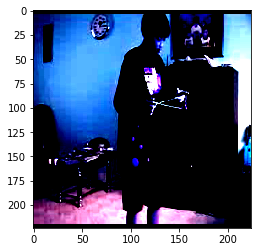

In [132]:
%matplotlib inline

filename = '../data/UCF101/UCF-101/YoYo/v_YoYo_g25_c05.avi'
augment = True
frame = loadFrame((filename, augment))

plt.imshow(frame.transpose(1,2,0))


In [133]:
import numpy as np
import os
import sys
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.distributed as dist
import torchvision

# from helperFunctions import getUCF101
# from helperFunctions import loadFrame

import h5py
import cv2

from multiprocessing import Pool

IMAGE_SIZE = 224
NUM_CLASSES = 101
batch_size = 100
lr = 0.0001
num_of_epochs = 10


data_directory = '../data/UCF101/UCF-101/'
class_list, train, test = getUCF101(base_directory = data_directory)

In [138]:
model =  torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(2048,NUM_CLASSES)

for param in model.parameters():
    param.requires_grad_(False)

# for param in model.conv1.parameters():
#     param.requires_grad_(True)
# for param in model.bn1.parameters():
#     param.requires_grad_(True)
# for param in model.layer1.parameters():
#     param.requires_grad_(True)
# for param in model.layer2.parameters():
#     param.requires_grad_(True)
# for param in model.layer3.parameters():
#     param.requires_grad_(True)
for param in model.layer4[2].parameters():
    param.requires_grad_(True)
for param in model.fc.parameters():
    param.requires_grad_(True)

params = []
# for param in model.conv1.parameters():
#     params.append(param)
# for param in model.bn1.parameters():
#     params.append(param)
# for param in model.layer1.parameters():
#     params.append(param)
# for param in model.layer2.parameters():
#     params.append(param)
# for param in model.layer3.parameters():
#     params.append(param)
for param in model.layer4[2].parameters():
    params.append(param)
for param in model.fc.parameters():
    params.append(param)

#model.cuda()

optimizer = optim.Adam(params,lr=lr)
criterion = nn.CrossEntropyLoss()

In [139]:
pool_threads = Pool(8,maxtasksperchild=200)

Exception: ../data/UCF101/UCF-101/GolfSwing/v_GolfSwing_g22_c03.avi


In [140]:
for epoch in range(0,num_of_epochs):

    ###### TRAIN
    train_accu = []
    model.train()
    random_indices = np.random.permutation(len(train[0]))
    start_time = time.time()
    for i in range(0, len(train[0])-batch_size,batch_size):

        augment = True
        video_list = [(train[0][k],augment)
                       for k in random_indices[i:(batch_size+i)]]
        data = pool_threads.map(loadFrame,video_list)

        next_batch = 0
        for video in data:
            if video.size==0: # there was an exception, skip this
                next_batch = 1
        if(next_batch==1):
            continue

        x = np.asarray(data,dtype=np.float32)
        x = Variable(torch.FloatTensor(x))# .cuda().contiguous()

        y = train[1][random_indices[i:(batch_size+i)]]
        y = torch.from_numpy(y) #.cuda()

        output = model(x)

        loss = criterion(output, y)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()
        
        prediction = output.data.max(1)[1]
        accuracy = ( float( prediction.eq(y.data).sum() ) /float(batch_size))*100.0
        if(epoch==0):
            print(i,accuracy)
        train_accu.append(accuracy)
    accuracy_epoch = np.mean(train_accu)
    print(epoch, accuracy_epoch,time.time()-start_time)

torch.save(model,'single_frame.model')
pool_threads.close()
pool_threads.terminate()

0 1.0
100 1.0
200 0.0
300 1.0
400 4.0
500 3.0
600 9.0
700 5.0
800 7.000000000000001
900 7.000000000000001
1000 15.0
1100 7.000000000000001
1200 8.0
1300 15.0
1400 14.000000000000002
1500 20.0
1600 22.0
1700 17.0
1800 22.0
1900 17.0
2000 13.0
2100 19.0
2200 28.999999999999996
2300 21.0
2400 32.0
2500 22.0
2600 25.0
2700 20.0
2800 31.0
2900 30.0
3000 34.0
3100 21.0
3200 22.0
3300 22.0
3400 22.0
3500 27.0
3600 41.0
3700 36.0
3800 34.0
3900 32.0
4000 32.0
4100 24.0
4200 31.0
4400 30.0
4500 33.0
4600 35.0
4700 39.0
4800 45.0
4900 24.0
5000 37.0
5100 33.0
5200 37.0
5300 48.0
5400 41.0
5500 44.0
5600 40.0
5700 38.0
5800 42.0
5900 39.0
6000 50.0
6100 55.00000000000001
6200 41.0
6300 54.0
6400 51.0
6500 42.0
6600 46.0
6700 37.0
6800 47.0
6900 49.0
7000 39.0
7100 43.0
7200 49.0
7300 49.0
7400 50.0
7500 44.0
7600 45.0
7700 42.0
7800 59.0
7900 52.0
8000 43.0
8100 49.0
8200 48.0
8300 51.0
8400 56.99999999999999
8500 52.0
8600 54.0
8700 43.0
8800 55.00000000000001
8900 61.0
9000 49.0
9100 49.0
9200 

Process ForkPoolWorker-36:
Process ForkPoolWorker-38:
Process ForkPoolWorker-34:
Process ForkPoolWorker-40:
Process ForkPoolWorker-39:
Process ForkPoolWorker-33:
Process ForkPoolWorker-37:
Process ForkPoolWorker-35:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/andreamunafo/opt/anaconda3/envs/number-five-dl/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/andreamunafo/opt/anaconda3/envs/number-five-dl/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/andreamunafo/opt/anaconda3/envs/number-five-dl/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/andreamunafo/opt/anaconda3/envs/number-five-dl/lib/python

KeyboardInterrupt: 